In [1]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from case118.dataset import Dataset

device = 'cuda'
s = 1

In [2]:
import os
os.getcwd()

'C:\\Users\\aless\\Documents\\GitHub\\ML-techniques-for-State-Estimation\\net95'

In [3]:
alt_x = np.load('../net95/simulations_net95/net_95_v1/measured_data_x_alt.npy')
alt_y = np.load('../net95/simulations_net95/net_95_v1/data_y_alt.npy')
data_x = alt_x
data_y = alt_y

split_train = int(0.8 * data_x.shape[0])
train_x = data_x[:split_train, :]
train_y = data_y[:split_train, :]

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, shuffle=True, random_state=42)

train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.3, shuffle=True, random_state=42)


val_data = Dataset(val_x, val_y)
val_dataloader = DataLoader(val_data, batch_size=int(len(val_data) / s), drop_last=False)

test_data = Dataset(test_x, test_y)
# test_dataloader = DataLoader(test_data, batch_size=100, drop_last=True)
test_dataloader = DataLoader(test_data, batch_size=len(test_data))


In [4]:
num_input = 206
num_output = 95

in_columns = [str(i) for i in range(num_input)]
out_columns = [str(i) for i in range(num_input, num_input + num_output)]

In [6]:
from case118.networks import ANN

model = ANN(num_input, 1580, num_output, dropout=0.2302727528297988).to(device)
model.load_state_dict(torch.load("model_net95v1_20.pth"))
model.eval()
model = model.to(device)

In [7]:
from net95.scenarios2 import get_data_by_scenario_and_case

scenario = case = 1
s1_c1_data = get_data_by_scenario_and_case(scenario, case, net_name='net95v1')
x = s1_c1_data[0]
x_hat = s1_c1_data[1]
y_all = s1_c1_data[2]
y_hat_all = s1_c1_data[3]

x.T

array([[ 0.00000000e+00],
       [ 8.20920000e-01],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 1.46100000e-02],
       [ 0.00000000e+00],
       [ 3.04600000e-02],
       [ 0.00000000e+00],
       [ 2.80500000e-02],
       [ 0.00000000e+00],
       [ 4.86999999e-03],
       [ 0.00000000e+00],
       [ 4.86999999e-03],
       [ 0.00000000e+00],
       [ 1.56900000e-02],
       [ 0.00000000e+00],
       [ 1.31600000e-02],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 5.75399999e-02],
       [ 5.72499999e-02],
       [ 2.77699999e-02],
       [ 2.91999999e-02],
       [ 0.00000000e+00],
       [ 1.46400000e-02],
       [ 6.77599999e-01],
       [-6.74999999e-01],
       [ 0.00000000e+00],
       [ 2.63200000e-02],
       [ 0.00000000e+00],
       [ 1.83100000e-02],
       [ 0.00000000e+00],
       [ 4.82999999e-02],
       [ 3.40699999e-02],
       [ 2.77699999e-02],
       [ 0.00000000e+00],
       [ 5.60499998e-02],
       [ 1.17340000e-01],
       [ 7.3

In [6]:
from net95.scenarios2 import get_data_by_scenario_and_case

model.eval()
OUTPUT = .0
print('SCENARIO 1, CASE 1 VALIDATION')
s1_c1_data = get_data_by_scenario_and_case(1, 1, net_name='net95v1')
x = s1_c1_data[0]
x_hat = s1_c1_data[1]
y = s1_c1_data[2]
y_hat = s1_c1_data[3]

test_data = Dataset(x, y)
# test_dataloader = DataLoader(test_data, batch_size=100, drop_last=True)
test_dataloader = DataLoader(test_data, batch_size=len(test_data))

for batch, (X, y) in enumerate(test_dataloader):
    X, y = X.to(device), y.to(device)
    to_be_explained = X
    pred = model(X)
    y = y.cpu().detach().numpy()
    pred = pred.cpu().detach().numpy()
    
    OUTPUT += np.sqrt(np.mean(np.square(y - pred)))
    
print(y)
print(pred)

SCENARIO 1, CASE 1 VALIDATION
[[1.         0.99946684 0.9989983  0.9989942  0.9947087  0.9946817
  0.99055916 0.99047995 0.9862533  0.9861486  0.984141   0.9824043
  0.98129886 0.98128974 0.979912   0.9798739  0.9785043  0.9784843
  0.9778202  0.977707   0.97763634 0.97682196 0.97604895 0.97494286
  0.97452563 0.97450477 0.9729199  0.9734869  0.9812664  0.9812065
  0.97792023 0.97787195 0.9754478  0.97520673 0.975091   0.9744398
  0.97152114 0.9711914  0.9708612  0.9708441  0.9692097  0.968359
  0.9681063  0.9680341  0.9676838  0.96747154 0.96736103 0.9671488
  0.9671105  0.9667817  0.9667196  0.96654546 0.9664712  0.9662769
  0.96760386 0.9675494  0.96752566 0.96747595 0.9674536  0.9663646
  0.9653878  0.96533215 0.965282   0.96504396 0.9644931  0.9644317
  0.9641534  0.96370363 0.9633881  0.96335304 0.96301144 0.962856
  0.96280295 0.9626993  0.9626586  0.9624703  0.9661051  0.9659758
  0.9658684  0.96569663 0.9654394  0.9658924  0.9658543  0.96587515
  0.96530795 0.9647882  0.964553

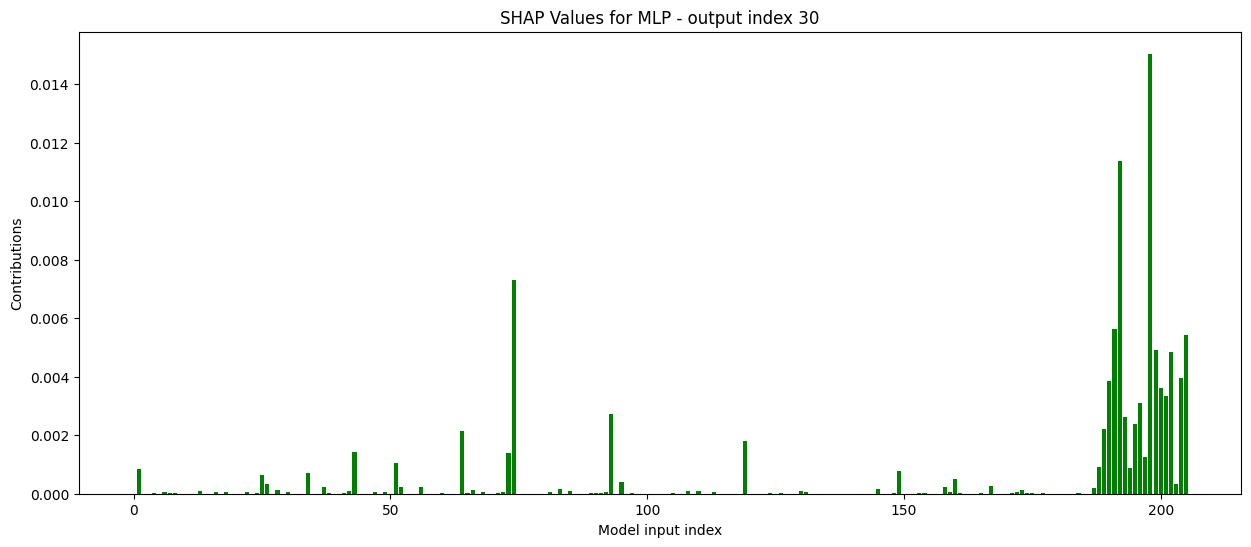

[(198, 0.015034767390667213), (192, 0.011363410392386902), (74, 0.0073157176347230625), (191, 0.005619508121793014), (205, 0.005407650005947867), (199, 0.004921957315835022), (202, 0.00485421327152282), (204, 0.003943397801041373), (190, 0.0038555764484655367), (200, 0.0036099007200627226)]


'\nnorm_relevance = ((relevance-abs(relevance)) / (max(relevance) - min(relevance)))\n\nprint(relevance)\nplt.imshow(norm_relevance.reshape((53, 1)))\nplt.colorbar()\n'

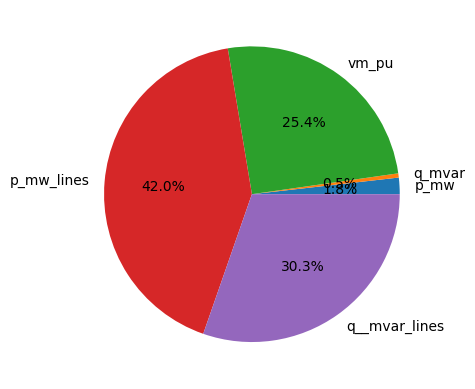

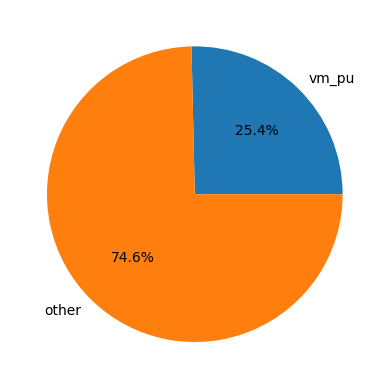

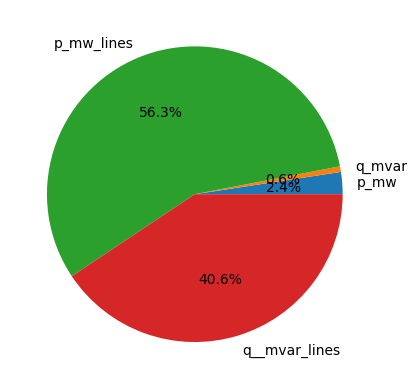

In [27]:
import shap
from net95.scenarios2 import get_data_by_scenario_and_case

import matplotlib.pyplot as plt

np.random.seed(42)
node_index = 30
columns_names = in_columns + out_columns

def wrapped_model(x):
    test_data = Dataset(x, np.zeros((len(x), 206)))
    test_dataloader = DataLoader(test_data, batch_size=len(test_data))

    with torch.no_grad():
        for batch, (X, _) in enumerate(test_dataloader):
            X, _ = X.to(device), _
            pred = model(X)
            pred = pred.cpu().detach().numpy()
    return pred


scenario = case = 1


s1_c1_data = get_data_by_scenario_and_case(scenario, case, net_name='net95v1')
x_true = s1_c1_data[0]
to_be_explained = x_true.ravel()
#to_be_explained = test_x[0]

random_indices = np.random.choice(test_x.shape[0], size=100, replace=False)
explainer = shap.KernelExplainer(wrapped_model, train_x[random_indices])
shap_values = explainer.shap_values(to_be_explained)
relevance = abs(shap_values[:, node_index].ravel())

x_positions = np.arange(len(relevance))
plt.figure(figsize=(15,6))
plt.bar(x_positions, relevance, color='green')
plt.xlabel('Model input index')
plt.ylabel('Contributions')
plt.title(f'SHAP Values for MLP - output index {node_index}')

plt.show()
print(sorted([(i, j) for i,j in enumerate(relevance)], key=lambda t: -t[1])[:10])
plt.show()


fig, ax = plt.subplots()
labels = ['p_mw', 'q_mvar', 'vm_pu', 'p_mw_lines', 'q__mvar_lines']
aggregate_data = [sum(relevance[:94])/94., sum(relevance[94:94+94])/94., sum(relevance[94+94:94+94+4])/4., sum(relevance[94+94+4:94+94+4+7])/7., sum(relevance[94+94+4+7:])/7.]
ax.pie(aggregate_data, labels=labels, autopct='%1.1f%%')


fig, ax = plt.subplots()
labels = ['vm_pu', 'other']
aggregate_data = [sum(relevance[94+94:94+94+4])/4., sum(relevance[:94])/94. + sum(relevance[94:94+94])/94. + sum(relevance[94+94+4:94+94+4+7])/7. + sum(relevance[94+94+4+7:])/7.]
ax.pie(aggregate_data, labels=labels, autopct='%1.1f%%')


fig, ax = plt.subplots()
labels = ['p_mw', 'q_mvar', 'p_mw_lines', 'q__mvar_lines']
aggregate_data = [sum(relevance[:94])/94., sum(relevance[94:94+94])/94., sum(relevance[94+94+4:94+94+4+7])/7., sum(relevance[94+94+4+7:])/7.]
ax.pie(aggregate_data, labels=labels, autopct='%1.1f%%')

'''
norm_relevance = ((relevance-abs(relevance)) / (max(relevance) - min(relevance)))

print(relevance)
plt.imshow(norm_relevance.reshape((53, 1)))
plt.colorbar()
'''

In [17]:
import lime.lime_tabular
import matplotlib.pyplot as plt

np.random.seed(42)

node_index = 0
columns_names = in_columns + out_columns
predictor = model

def wrapped_model(x):
    test_data = Dataset(x, np.zeros((len(x), 18)))
    test_dataloader = DataLoader(test_data, batch_size=len(test_data))

    with torch.no_grad():
        for batch, (X, _) in enumerate(test_dataloader):
            X, _ = X.to(device), _
            pred = model(X)
            pred = pred.cpu().detach().numpy()
    return pred[:, node_index]

to_be_explained = test_x[0]
random_indices = np.random.choice(test_x.shape[0], size=100, replace=False)
background = train_x[random_indices]
explainer = lime.lime_tabular.LimeTabularExplainer(
    background,
    feature_names=columns_names[:-1],
    verbose=True,
    mode='regression'
)

exp = explainer.explain_instance(to_be_explained, wrapped_model, num_features=53)
relevance = abs(np.asarray([j for i,j in sorted(exp.local_exp[1], key=lambda i: i[0])]))

x_positions = np.arange(len(relevance))
plt.figure(figsize=(15,6))
plt.bar(x_positions, relevance, color='green')
plt.xlabel('Model input index')
plt.ylabel('Contributions')
plt.title(f'LIME for MLP - output index {node_index}')
#plt.xticks(x_positions, ['A', 'B', 'C', 'D', 'E'])

plt.show()

Intercept 1.3098351846840768
Prediction_local [1.48234724]
Right: 1.0332918


KeyboardInterrupt: 

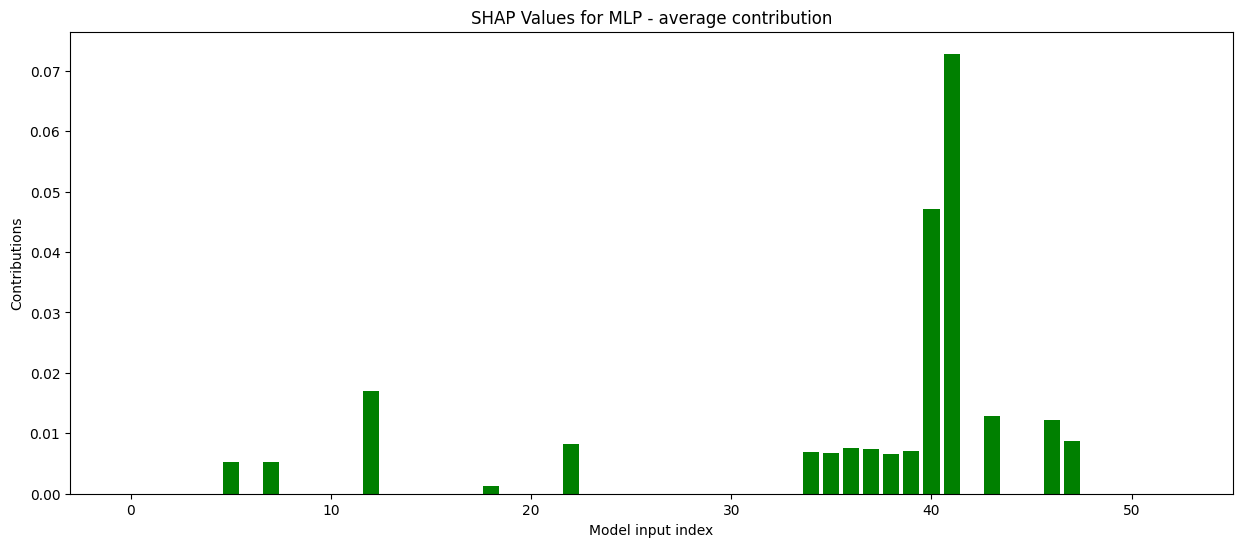

'\nnorm_relevance = ((relevance-abs(relevance)) / (max(relevance) - min(relevance)))\n\nprint(relevance)\nplt.imshow(norm_relevance.reshape((53, 1)))\nplt.colorbar()\n'

In [7]:
import shap

import matplotlib.pyplot as plt

np.random.seed(42)
columns_names = in_columns + out_columns

def wrapped_model(x):
    test_data = Dataset(x, np.zeros((len(x), 18)))
    test_dataloader = DataLoader(test_data, batch_size=len(test_data))

    with torch.no_grad():
        for batch, (X, _) in enumerate(test_dataloader):
            X, _ = X.to(device), _
            pred = model(X)
            pred = pred.cpu().detach().numpy()
    return pred

to_be_explained = test_x[0]
random_indices = np.random.choice(test_x.shape[0], size=100, replace=False)
explainer = shap.KernelExplainer(wrapped_model, train_x[random_indices])
shap_values = explainer.shap_values(to_be_explained)
relevance = abs(np.asarray(shap_values)).mean(axis=0).ravel()

x_positions = np.arange(len(relevance))
plt.figure(figsize=(15,6))
plt.bar(x_positions, relevance, color='green')
plt.xlabel('Model input index')
plt.ylabel('Contributions')
plt.title(f'SHAP Values for MLP - average contribution')

plt.show()

'''
norm_relevance = ((relevance-abs(relevance)) / (max(relevance) - min(relevance)))

print(relevance)
plt.imshow(norm_relevance.reshape((53, 1)))
plt.colorbar()
'''

Intercept 1.3098351846840768
Prediction_local [1.48234724]
Right: 1.0332918
Intercept 1.3017031487195545
Prediction_local [1.47955733]
Right: 1.0407789
Intercept 1.330051071351322
Prediction_local [1.46963553]
Right: 1.0485772
Intercept 1.3253889881312677
Prediction_local [1.43692781]
Right: 1.0486283
Intercept 1.3106817205197252
Prediction_local [1.49429091]
Right: 1.0512676
Intercept 1.299313470013961
Prediction_local [1.54049217]
Right: 1.0514313
Intercept 1.3096952021586288
Prediction_local [1.51094362]
Right: 1.0515796
Intercept 1.3168373907844408
Prediction_local [1.44104878]
Right: 1.052104
Intercept 1.3016827701750997
Prediction_local [1.50070299]
Right: 1.0529795
Intercept 1.3281485309321692
Prediction_local [1.43956251]
Right: 1.0530177
Intercept 1.3217260840407739
Prediction_local [1.47039802]
Right: 1.0537829
Intercept 1.3208227148884384
Prediction_local [1.45037239]
Right: 1.0537694
Intercept 1.301292746714384
Prediction_local [1.58340047]
Right: 1.0678924
Intercept 1.3397

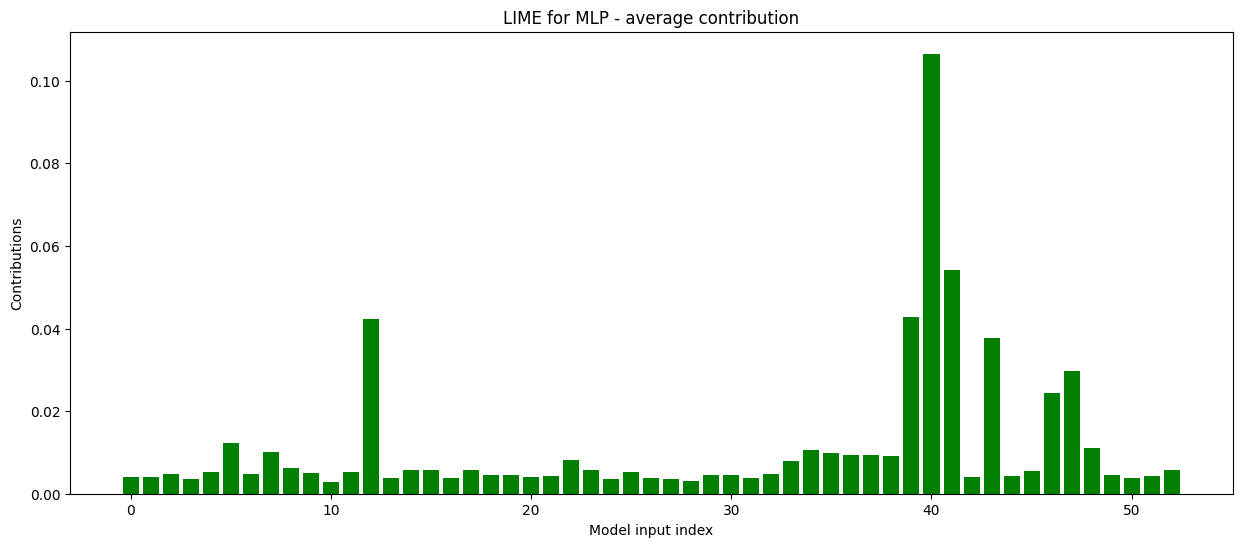

In [19]:
import lime.lime_tabular
import matplotlib.pyplot as plt

np.random.seed(42)

lime_values_total = []

columns_names = in_columns + out_columns
predictor = model

to_be_explained = test_x[0]
random_indices = np.random.choice(test_x.shape[0], size=100, replace=False)
background = train_x[random_indices]
explainer = lime.lime_tabular.LimeTabularExplainer(
    background,
    feature_names=columns_names[:-1],
    verbose=True,
    mode='regression'
)


for i in range(num_output):
    def wrapped_model(x):
        test_data = Dataset(x, np.zeros((len(x), 18)))
        test_dataloader = DataLoader(test_data, batch_size=len(test_data))
    
        with torch.no_grad():
            for batch, (X, _) in enumerate(test_dataloader):
                X, _ = X.to(device), _
                pred = model(X)
                pred = pred.cpu().detach().numpy()
        return pred[:, i]
    exp = explainer.explain_instance(to_be_explained, wrapped_model, num_features=53)
    lime_values = abs(np.asarray([j for i,j in sorted(exp.local_exp[1], key=lambda i: i[0])]))
    lime_values_total.append([abs(lime_values.ravel())])

relevance = np.asarray(lime_values_total).mean(axis=0).ravel()


x_positions = np.arange(len(relevance))
plt.figure(figsize=(15,6))
plt.bar(x_positions, relevance, color='green')
plt.xlabel('Model input index')
plt.ylabel('Contributions')
plt.title(f'LIME for MLP - average contribution')
#plt.xticks(x_positions, ['A', 'B', 'C', 'D', 'E'])

plt.show()

  0%|          | 0/1 [00:00<?, ?it/s]

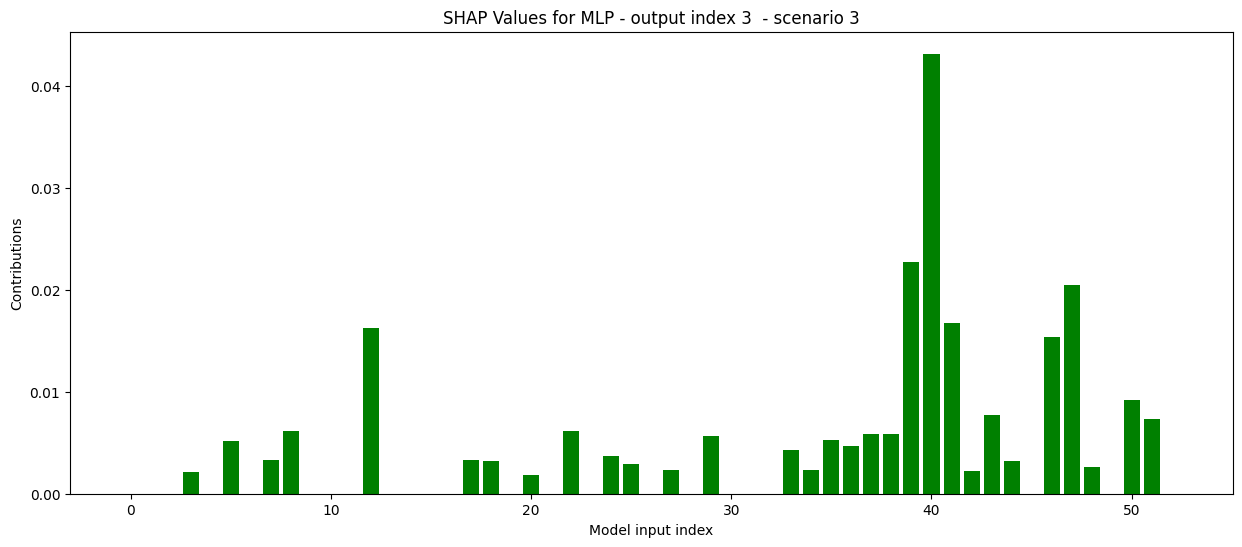

'\nnorm_relevance = ((relevance-abs(relevance)) / (max(relevance) - min(relevance)))\n\nprint(relevance)\nplt.imshow(norm_relevance.reshape((53, 1)))\nplt.colorbar()\n'

In [7]:
from net18.scenarios2 import get_data_by_scenario_and_case
import shap

import matplotlib.pyplot as plt


np.random.seed(42)
scenario = 3
case = 1

s1_c1_data = get_data_by_scenario_and_case(scenario, case)
x = s1_c1_data[0]
x_hat = s1_c1_data[1]
y_all = s1_c1_data[2]
y_hat_all = s1_c1_data[3]

node_index = 3


columns_names = in_columns + out_columns

def wrapped_model(x):
    test_data = Dataset(x, np.zeros((len(x), 18)))
    test_dataloader = DataLoader(test_data, batch_size=len(test_data))

    with torch.no_grad():
        for batch, (X, _) in enumerate(test_dataloader):
            X, _ = X.to(device), _
            pred = model(X)
            pred = pred.cpu().detach().numpy()
    return pred

to_be_explained = x_hat
random_indices = np.random.choice(test_x.shape[0], size=100, replace=False)
explainer = shap.KernelExplainer(wrapped_model, train_x[random_indices])
shap_values = explainer.shap_values(to_be_explained)
relevance = abs(shap_values[node_index].ravel())

x_positions = np.arange(len(relevance))
plt.figure(figsize=(15,6))
plt.bar(x_positions, relevance, color='green')
plt.xlabel('Model input index')
plt.ylabel('Contributions')
plt.title(f'SHAP Values for MLP - output index {node_index}  - scenario {scenario}')

plt.show()

'''
norm_relevance = ((relevance-abs(relevance)) / (max(relevance) - min(relevance)))

print(relevance)
plt.imshow(norm_relevance.reshape((53, 1)))
plt.colorbar()
'''

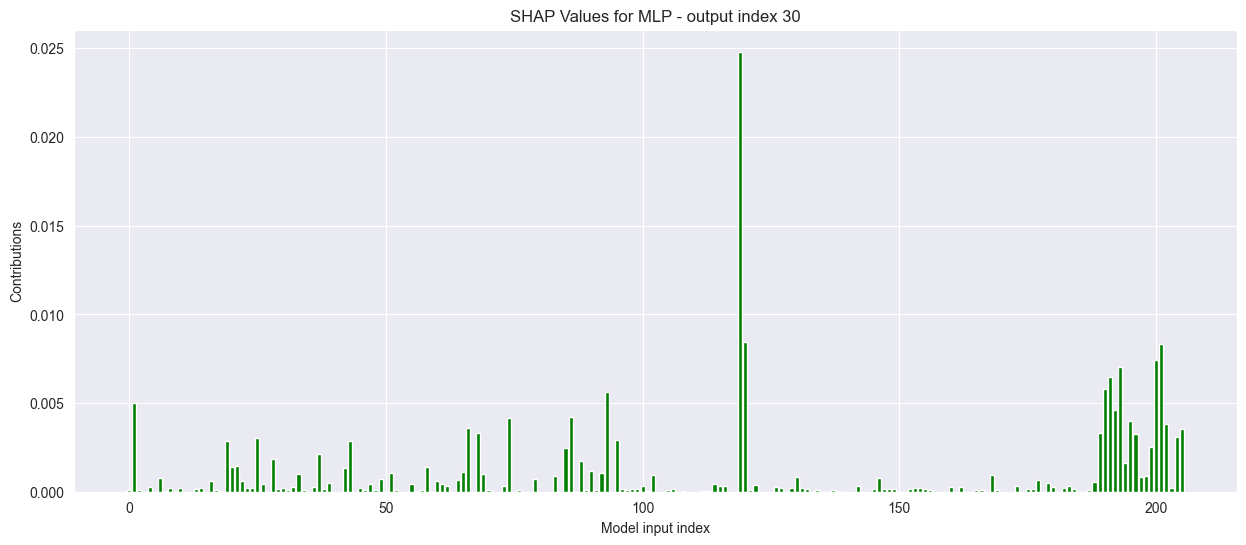

[(119, 0.024802633427313224), (120, 0.008431753499884348), (201, 0.008311068041884638), (200, 0.0074261155031037085), (193, 0.00705591591429194), (191, 0.006461050022566984), (190, 0.005769974452286586), (93, 0.005601319037347098), (1, 0.004977849619485431), (192, 0.004597179715834667)]


'\nnorm_relevance = ((relevance-abs(relevance)) / (max(relevance) - min(relevance)))\n\nprint(relevance)\nplt.imshow(norm_relevance.reshape((53, 1)))\nplt.colorbar()\n'

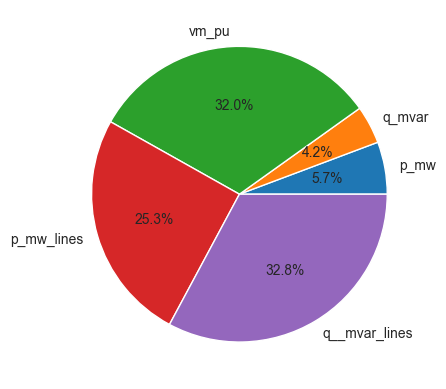

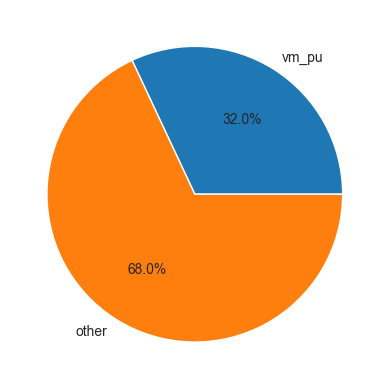

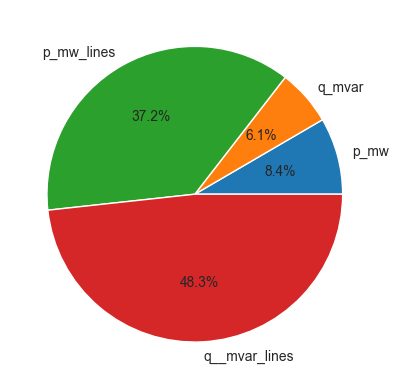

In [8]:
import shap
from net95.scenarios2 import get_data_by_scenario_and_case

import matplotlib.pyplot as plt

np.random.seed(42)
node_index = 30
columns_names = in_columns + out_columns

def wrapped_model(x):
    test_data = Dataset(x, np.zeros((len(x), 206)))
    test_dataloader = DataLoader(test_data, batch_size=len(test_data))

    with torch.no_grad():
        for batch, (X, _) in enumerate(test_dataloader):
            X, _ = X.to(device), _
            pred = model(X)
            pred = pred.cpu().detach().numpy()
    return pred


scenario = case = 1


s1_c1_data = get_data_by_scenario_and_case(scenario, case, net_name='net95v1')
x_true = s1_c1_data[0]
to_be_explained = x_true.ravel()
#to_be_explained = test_x[0]

random_indices = np.random.choice(test_x.shape[0], size=100, replace=False)
explainer = shap.KernelExplainer(wrapped_model, train_x[random_indices])
shap_values = explainer.shap_values(to_be_explained)
relevance = abs(shap_values[:, node_index].ravel())

x_positions = np.arange(len(relevance))
plt.figure(figsize=(15,6))
plt.bar(x_positions, relevance, color='green')
plt.xlabel('Model input index')
plt.ylabel('Contributions')
plt.title(f'SHAP Values for MLP - output index {node_index}')

plt.show()
print(sorted([(i, j) for i,j in enumerate(relevance)], key=lambda t: -t[1])[:10])
plt.show()


fig, ax = plt.subplots()
labels = ['p_mw', 'q_mvar', 'vm_pu', 'p_mw_lines', 'q__mvar_lines']
aggregate_data = [sum(relevance[:94])/94., sum(relevance[94:94+94])/94., sum(relevance[94+94:94+94+4])/4., sum(relevance[94+94+4:94+94+4+7])/7., sum(relevance[94+94+4+7:])/7.]
ax.pie(aggregate_data, labels=labels, autopct='%1.1f%%')


fig, ax = plt.subplots()
labels = ['vm_pu', 'other']
aggregate_data = [sum(relevance[94+94:94+94+4])/4., sum(relevance[:94])/94. + sum(relevance[94:94+94])/94. + sum(relevance[94+94+4:94+94+4+7])/7. + sum(relevance[94+94+4+7:])/7.]
ax.pie(aggregate_data, labels=labels, autopct='%1.1f%%')


fig, ax = plt.subplots()
labels = ['p_mw', 'q_mvar', 'p_mw_lines', 'q__mvar_lines']
aggregate_data = [sum(relevance[:94])/94., sum(relevance[94:94+94])/94., sum(relevance[94+94+4:94+94+4+7])/7., sum(relevance[94+94+4+7:])/7.]
ax.pie(aggregate_data, labels=labels, autopct='%1.1f%%')

'''
norm_relevance = ((relevance-abs(relevance)) / (max(relevance) - min(relevance)))

print(relevance)
plt.imshow(norm_relevance.reshape((53, 1)))
plt.colorbar()
'''